In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Read in data
df = pd.read_csv("population_data_updated.csv")

countries = ['China', 'Congo', 'Ethiopia', 'India', 'Japan', 'Nigeria',
       'Pakistan', 'Philippines', 'Egypt', 'United States of America']

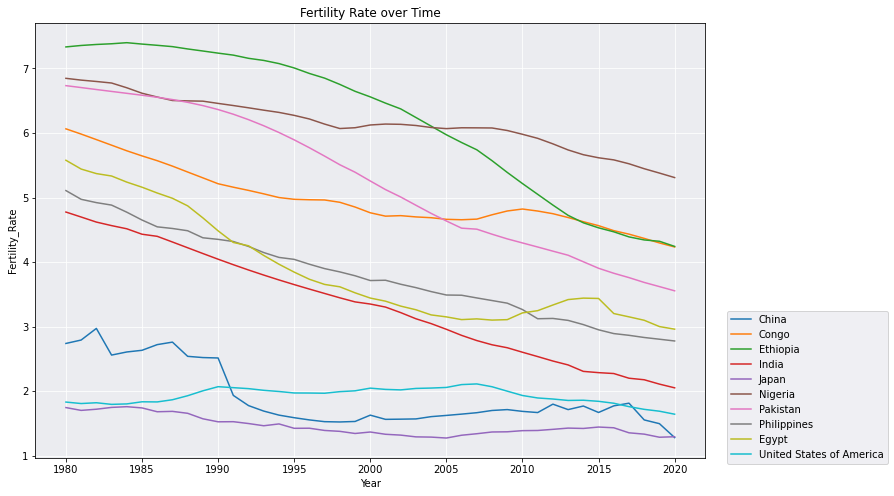

In [29]:
### Plot of fertility rate over time
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(True, color = 'white')
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

for country in countries:
    x = df[df['location'] == country]['timeLabel']
    y = df[df['location'] == country]['Fertility_rate']
    ax.plot(x, y)

plt.title('Fertility Rate over Time')
plt.xlabel('Year')
plt.ylabel('Fertility_Rate')
plt.legend(countries, 
           bbox_to_anchor = (1.28, 0.35),
           facecolor = '#EBECF0') 

plt.savefig('fert_rate_over_time.png', bbox_inches = 'tight', pad_inches = 1)

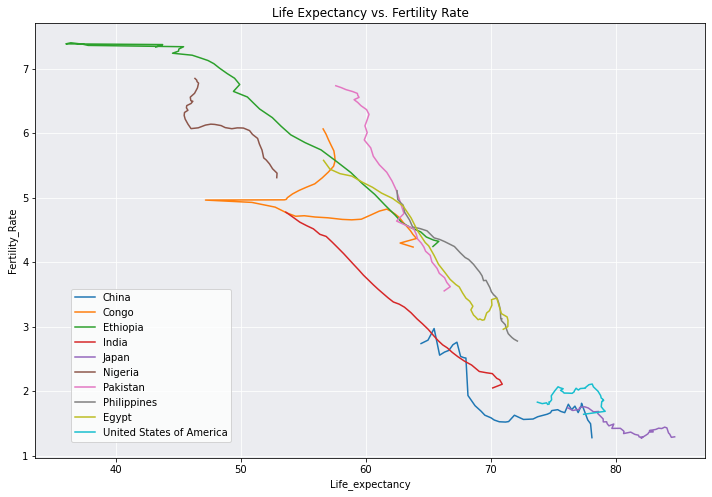

In [25]:
### Now, life expectancy vs fertility rate

fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(True, color = 'white')
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

for country in countries:
    x = df[df['location'] == country]['Life_expectancy']
    y = df[df['location'] == country]['Fertility_rate']
    ax.plot(x, y)

plt.title('Life Expectancy vs. Fertility Rate')
plt.xlabel('Life_expectancy')
plt.ylabel('Fertility_Rate')
plt.legend(countries, 
           bbox_to_anchor = (0.3, 0.4),
           facecolor = 'white')

plt.savefig('fert_rate_vs_life_exp.png')

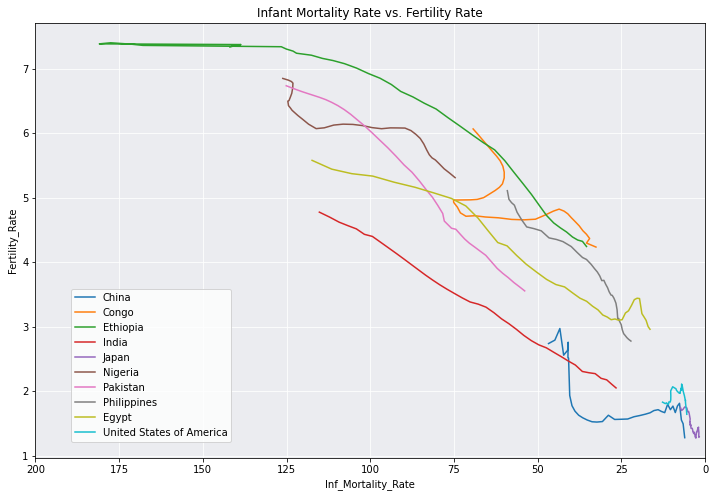

In [24]:
### infant mortality rate vs fertility rate
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(True, color = 'white')
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

for country in countries:
    x = df[df['location'] == country]['Inf_Mortality_rate']
    y = df[df['location'] == country]['Fertility_rate']
    ax.plot(x, y)

plt.title('Infant Mortality Rate vs. Fertility Rate')
plt.xlabel('Inf_Mortality_Rate')
plt.ylabel('Fertility_Rate')
plt.legend(countries, 
           bbox_to_anchor = (0.3, 0.4),
           facecolor = 'white')
plt.xlim([200, 0])

plt.savefig('fert_rate_vs_inf_mort.png')

In [35]:
### Table of values in 2020
df2020 = df[df['timeLabel'] == 2020][['location', 'timeLabel', 'Life_expectancy', 'Fertility_rate', 'Birth_rate']].sort_values(by = 'Life_expectancy', ascending = False)


ValueError: OutputDocumentFor expects a sequence of Models

In [112]:
### Exploring change over time
life_exp = []
fert_rate = []
inf_mort = []

for country in countries:
    recent = df.loc[(df.timeLabel == 2020) & (df.location == country),'Life_expectancy'].values[0]
    earliest = df.loc[(df.timeLabel == 1980) & (df.location == country),'Life_expectancy'].values[0]
    life_exp.append(round(recent - earliest, 2))
    
    recent = df.loc[(df.timeLabel == 2020) & (df.location == country),'Fertility_rate'].values[0]
    earliest = df.loc[(df.timeLabel == 1980) & (df.location == country),'Fertility_rate'].values[0]
    fert_rate.append(round(recent - earliest, 2))
    
    recent = df.loc[(df.timeLabel == 2020) & (df.location == country),'Inf_Mortality_rate'].values[0]
    earliest = df.loc[(df.timeLabel == 1980) & (df.location == country),'Inf_Mortality_rate'].values[0]
    inf_mort.append(round(recent - earliest, 2))

d = {'Country':countries, 'Life_exp_change':life_exp, 'Fert_rate_change':fert_rate, 'Inf_mort_change':inf_mort}
    
changes = pd.DataFrame(d)
changes.to_csv('change.csv')

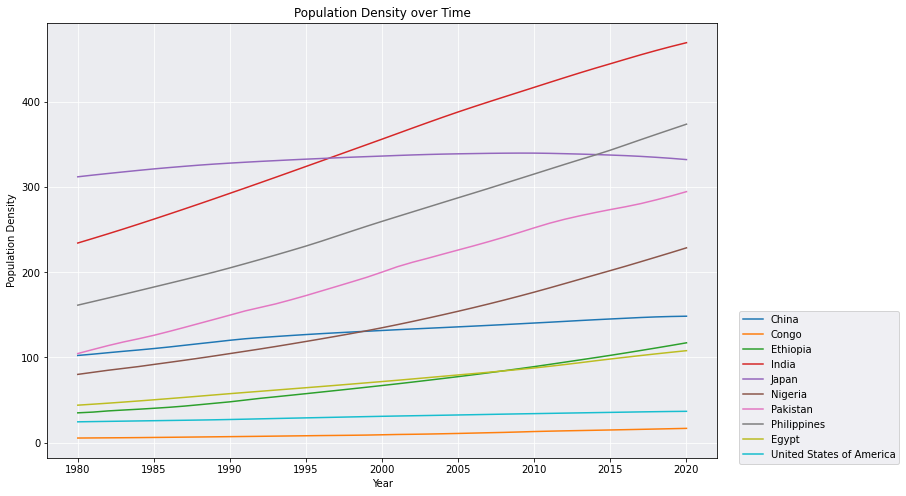

In [3]:
### Population density over time
fig, ax = plt.subplots(figsize = (12, 8))
ax.grid(True, color = 'white')
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

for country in countries:
    x = df[df['location'] == country]['timeLabel']
    y = df[df['location'] == country]['Pop_density']
    ax.plot(x, y)
    
plt.title('Population Density over Time')
plt.xlabel('Year')
plt.ylabel('Population Density')
plt.legend(countries, 
           bbox_to_anchor = (1.28, 0.35),
           facecolor = '#EBECF0')

plt.savefig('pop_dens_over_time.png', bbox_inches = 'tight', pad_inches = 1)

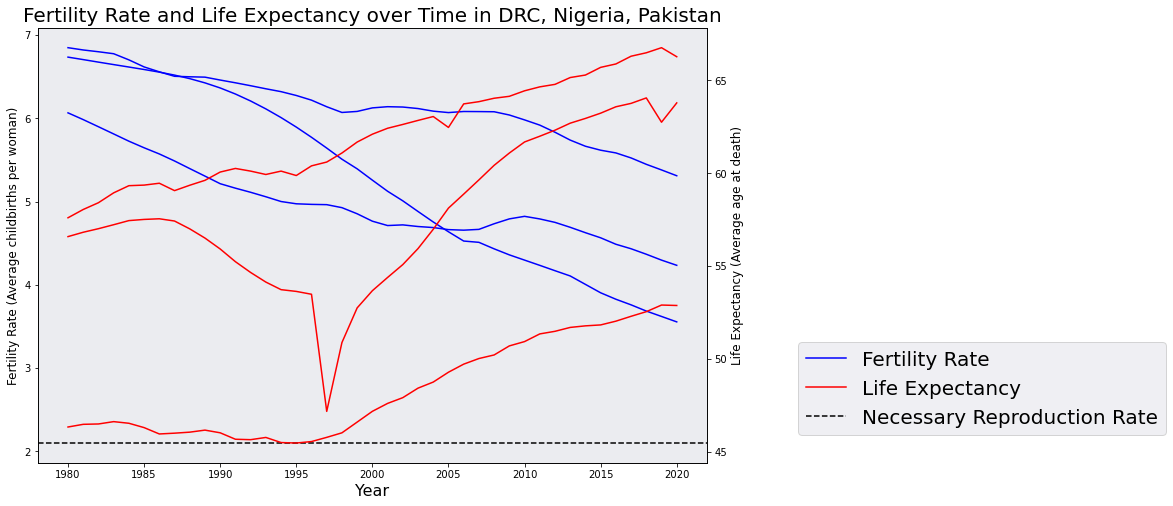

In [13]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

countries = ['Congo', 'Nigeria', 'Pakistan']

for country in countries:
    x = df[df['location'] == country]['timeLabel']
    y = df[df['location'] == country]['Fertility_rate']
    color = 'blue'
    ax.plot(x, y, color = color)

ax2 = ax.twinx()

countries = countries = ['Congo', 'Nigeria', 'Pakistan']

for country in countries:
    x = df[df['location'] == country]['timeLabel']
    y = df[df['location'] == country]['Life_expectancy']
    color = 'red'
    ax2.plot(x, y, color = color)

plt.title('Fertility Rate and Life Expectancy over Time in DRC, Nigeria, Pakistan', size = 20)
ax.set_xlabel('Year', size = 16)
ax.set_ylabel('Fertility Rate (Average childbirths per woman)', size = 12)
ax2.set_ylabel('Life Expectancy (Average age at death)', size = 12)

leg = plt.legend(['Fertility Rate', 'Life Expectancy', 'Necessary Reproduction Rate'],
          bbox_to_anchor = (1.7, 0.3),
          facecolor = '#EBECF0',
                prop={'size': 20})
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')
leg.legendHandles[2].set_color('black')
leg.legendHandles[2].set_linestyle('--')

ax.axhline(y = 2.1, color = 'black', linestyle = '--')


plt.show()

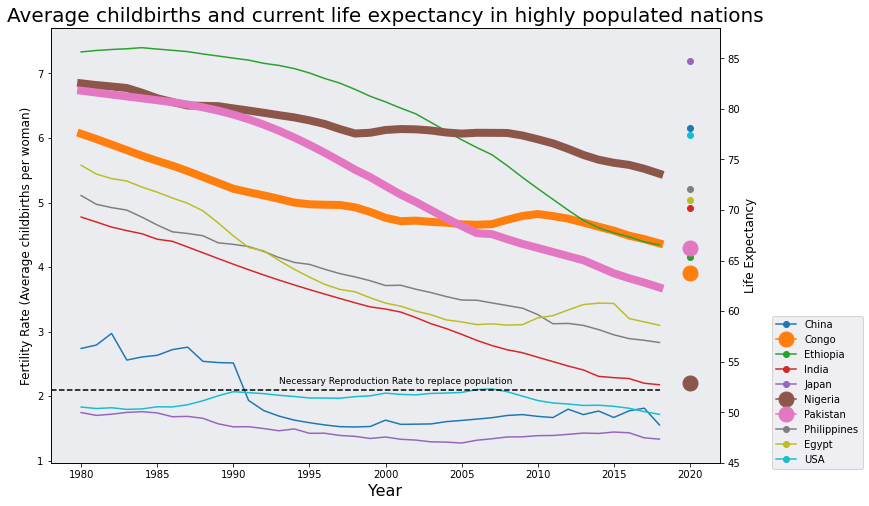

In [94]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.set_facecolor('#EBECF0')
ax.set_axisbelow(True)

countries = ['China', 'Congo', 'Ethiopia', 'India', 'Japan', 'Nigeria',
       'Pakistan', 'Philippines', 'Egypt', 'United States of America']

df2018 = df[df['timeLabel'] < 2019]
df2020 = df[df['timeLabel'] == 2020]

for country in countries:
    x = df2018[df2018['location'] == country]['timeLabel']
    y = df2018[df2018['location'] == country]['Fertility_rate']
    if country in ['Congo', 'Nigeria', 'Pakistan']:
        ax.plot(x, y, linewidth = 8)
        continue
    ax.plot(x, y)
    
ax2 = ax.twinx()

for country in countries:
    x = df2020[df2020['location'] == country]['timeLabel']
    y = df2020[df2020['location'] == country]['Life_expectancy']
    if country in ['Congo', 'Nigeria', 'Pakistan']:
        ax2.plot(x, y, markersize = 15, marker = "o")
        continue
    ax2.plot(x, y, marker = "o")

ax.annotate('Necessary Reproduction Rate to replace population', xy=(2000, 2.1), xytext=(1993, 2.2), fontsize=9)
    
plt.title('Average childbirths and current life expectancy in highly populated nations', size = 20)
ax.set_xlabel('Year', size = 16)
ax.set_ylabel('Fertility Rate (Average childbirths per woman)', size = 12)
ax2.set_ylabel('Life Expectancy', size = 12)
ax2.set_ylim([45, 88])

ax.axhline(y = 2.1, xmax = 0.91, color = 'black', linestyle = '--')

plt.legend(['China', 'Congo', 'Ethiopia', 'India', 'Japan', 'Nigeria',
       'Pakistan', 'Philippines', 'Egypt', 'USA'], 
           bbox_to_anchor = (1.22, 0.35),
           facecolor = '#EBECF0') 

plt.savefig('datastory.png', bbox_inches = 'tight', pad_inches = 0.3, 
            edgecolor = 'white', facecolor = 'white')